# Import the modules from biopython you want to use

In [20]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import Phylo
from Bio import SeqIO


# Basic seq record

In [21]:
DNA_test = Seq('AGTACACTGGT')
m_RNA = Seq('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')


## 1. Take these sequences through the general methods here: https://biopython.org/wiki/Seq in the following exercises


## A. Find the substring "AUAG" in the RNA sequence
## B. Count the number of As in the DNA sequence
## C. Take the complement and reverse complement of the DNA sequence
## D. Translate the RNA sequence

In [22]:


m_RNA.find("AUAG")
DNA_test.count("A")
DNA_test.reverse_complement()
m_RNA.translate()

# A tells you the location
print(m_RNA.find('AUAG'))
print(DNA_test.count('A'))

print(DNA_test.complement())
print(DNA_test.reverse_complement())
print(m_RNA.translate())

35
3
TCATGTGACCA
ACCAGTGTACT
MAIVMGR*KGAR*


## 2. What is a seqrecord? Go check this page: https://biopython.org/wiki/SeqRecord 

Seq record object that holds a seq object

"Biopython to hold a sequence (as a Seq object) with identifiers (ID and name), description and optionally annotation and sub-features."

## 3. Get familiar with the documentation: go to this tutorial and answer these questions: 
## https://biopython.org/DIST/docs/tutorial/Tutorial.html

## A. What are the attributes that a seqrecord can have? Use ctrl-F to go to the section "4.1 The SeqRecord object"

###### The attributes that seqrecord can have are seq object, identifiers (ID and name), description, annotations. 

## B.  What are all the currently supported file types for seqrecords that biopython can parse? Check here: https://biopython.org/wiki/SeqIO . Which ones might you use in YOUR masters project?

###### The all supported files are FASTA, GenBank, EMBL, FASTQ, Clustal, Nexus, Ohylip, Qual. The one I might use formy  master project are FASTA and GenBank.

## C. Let's look at some common file types: fasta and genbank. Read the KRAS fasta and genbank files as a seqrecord objects:



In [23]:
KRAS_fasta = SeqIO.read("KRAS.fasta", "fasta")
KRAS_gbk = SeqIO.read("KRAS_genbank.gb", "genbank")

## View the records

In [24]:
KRAS_gbk

SeqRecord(seq=Seq('GTCACTGTAACTATTTTTATTACATTACAATAATTAGGAGTAGTACAGTTCATG...TAG'), id='NC_000012.12', name='NC_000012', description='Homo sapiens chromosome 12, GRCh38.p14 Primary Assembly', dbxrefs=['BioProject:PRJNA168', 'Assembly:GCF_000001405.40'])

In [25]:
KRAS_fasta

SeqRecord(seq=Seq('GTCACTGTAACTATTTTTATTACATTACAATAATTAGGAGTAGTACAGTTCATG...TAG'), id='NC_000012.12:25205246-25250929', name='NC_000012.12:25205246-25250929', description='NC_000012.12:25205246-25250929 Homo sapiens chromosome 12, GRCh38.p14 Primary Assembly', dbxrefs=[])

## D. Look at the the sequence, ID, name, and description from the fasta file. 

In [26]:
print(KRAS_fasta.name)
print(KRAS_fasta.description)
print(KRAS_fasta.id)
print(KRAS_fasta.seq)

NC_000012.12:25205246-25250929
NC_000012.12:25205246-25250929 Homo sapiens chromosome 12, GRCh38.p14 Primary Assembly
NC_000012.12:25205246-25250929
GTCACTGTAACTATTTTTATTACATTACAATAATTAGGAGTAGTACAGTTCATGACAAAAATATTACAAATTTTAGATCACTTCACAGCACATACTCCTATAAACATTTAAAAGTTAATTTCAATTAAAAGAGTGGTCATTTTTAATGTTTGATATGACCAACATTCCTAGGTCAGCGCAACCAAATGATGGAAAACAACTGGATCACACTGCATATGTCCCACAAAAGAAAGCACAATGTACAAAATGTGCATGTTTCAGTTTACACTATACAAAAATAGTTAAAATACATTCCAGGTAAACATGTTACATTAAGAAATAGTACTAGTAAGAAATTGGCACTCAAAGGAAAAATGCAAAAGTATTTTCAACATGAAAACACAAGACAGTGGAATTGGAAACTTTCGGATAAAACACTGTAACCCAGTTAGCTCTGTGGGGGTGTGGGGGGAGAGATGGGCCCTCAACATATCTGCAGATAACTTTTTTTTCCCCTAAATTCATCTAAATTACCTATCATTATCCCAAACAGGCACTTCAAACTATTAAACTAAAACACAGATCTTAATCTAGTTATGACTATTCTTCAAGAACTCATGTGAGTATCTTTCTTTAGAAAGAAAGTTTCATTTTATGACAGCTATTCAGTTTCTCAATGCAGAATTCATGCTATCCAGTATTAACACAGAAGTTACTAAATATAAATTCAGCTTTAAGGTAACTGCTGGGTTCTAAAAAACATTACTACACAATTATCAAGAAATCATTACTTTTTGACAAATGGAAATCTTCAGATAGTTTTTGCTGTCTAAAAAAAAATCCCCTAAAAAAAGTTATATACTGTTTGAAGA

## E. Look at the the sequence, ID, name, and description from the genbank file (check section 4.2.3 from the tutorial)

# 4. Manipulating seq objects!
## A. Example: Transcribe the sequence from the fasta file and save it as a new seq record called KRAS_RNA

In [27]:
KRAS_RNA = KRAS_fasta.seq.transcribe()
KRAS_RNA

Seq('GUCACUGUAACUAUUUUUAUUACAUUACAAUAAUUAGGAGUAGUACAGUUCAUG...UAG')

## B. Your turn: translate the KRAS DNA sequence from the GENBANK object and save it as KRAS_PROTEIN. 

## The GTP-binding site for KRAS is amino acids 10-18, according to uniprot. Make a new seq record by extracting only those amino acids from this new protein and rename it as a new variable called KRAS_GBS

In [28]:
genbank_record = SeqIO.read("KRAS_genbank.gb", "genbank")
KRAS_PROTEIN = genbank_record.seq.translate(to_stop=True)
KRAS_GBS_seq = KRAS_PROTEIN[9:18]
KRAS_GBS = SeqRecord(
    seq=KRAS_GBS_seq,
    id="KRAS_GTP_BINDING_SITE",
    name="KRAS_GBS",
    description="KRAS GTP-binding site (aa 10-18)"
)

print(KRAS_GBS)

ID: KRAS_GTP_BINDING_SITE
Name: KRAS_GBS
Description: KRAS GTP-binding site (aa 10-18)
Number of features: 0
Seq('Q')


# 5. Working with sequence features. Go to Tutorial section 4.3 sequence feature and position objects. 
## A. What is the point of seqfeature objects?
### Sequence features are essential part of describing a sequence. It does help with organization and easily get at the more “abstract” information that is known about the sequence. Its object to describe a region on a paretn sequence "SeqRecord."

## B. Extract/look at the features of the genbank file

In [29]:
KRAS_gbk.features

[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(45684), strand=1), type='source'),
 SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(45684), strand=-1), type='gene'),
 SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(45518), ExactPosition(45684), strand=-1), FeatureLocation(ExactPosition(40028), ExactPosition(40150), strand=-1), FeatureLocation(ExactPosition(21988), ExactPosition(22167), strand=-1), FeatureLocation(ExactPosition(20368), ExactPosition(20528), strand=-1), FeatureLocation(ExactPosition(0), ExactPosition(4666), strand=-1)], 'join'), type='mRNA', location_operator='join'),
 SeqFeature(CompoundLocation([FeatureLocation(ExactPosition(45518), ExactPosition(45684), strand=-1), FeatureLocation(ExactPosition(40028), ExactPosition(40150), strand=-1), FeatureLocation(ExactPosition(21988), ExactPosition(22167), strand=-1), FeatureLocation(ExactPosition(20368), ExactPosition(20528), strand=-1), FeatureLocation(ExactPosition(10199), ExactPosition(10315)

## C. Print the information for the 10th feature of the KRAS genbank file (remember you can select from the list with brackets). 

#### print(genbank_record.features[9])

## What is the type for this feature? 

#### Based on the results below, the type is CDC.

## For the location attribute,why do you think there are multiple locations? 

#### I think, there are multiple locations because it can be split through multiple exons. 

## What does the + mean?
#### The + means that the feaure is on the forward (sense) strand.

In [30]:
print(genbank_record.features[9])

type: CDS
location: join{[40028:40139](-), [21988:22167](-), [20368:20528](-), [10199:10315](-), [6932:6933](-), [4549:4666](-)}
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:3845', 'HGNC:HGNC:6407', 'MIM:190070']
    Key: gene, Value: ['KRAS']
    Key: gene_synonym, Value: ["'C-K-RAS; C-K-RAS; c-Ki-ras; c-Ki-ras2; CFC2; K-Ras; K-Ras 2; K-RAS2A; K-RAS2B; K-RAS4A; K-RAS4B; KI-RAS; KRAS1; KRAS2; NS; NS3; OES; RALD; RASK2"]
    Key: note, Value: ['Derived by automated computational analysis using gene prediction method: Gnomon.']
    Key: product, Value: ['GTPase KRas isoform X1']
    Key: protein_id, Value: ['XP_047284782.1']
    Key: translation, Value: ['MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIMGVDDAFYTLVREIRKHKEKMSKDGKKKKKKSKTKCVIM']



# 6. Let's get a bit more into the genbank file's annotation information. 
## A. When you run the code below, what python data structure is this?
#### the code below return a dictionary with key and value. 

In [12]:
KRAS_gbk.annotations


{'molecule_type': 'DNA',
 'topology': 'linear',
 'data_file_division': 'CON',
 'date': '26-AUG-2024',
 'accessions': ['NC_000012', 'REGION:', '25205246..25250929'],
 'sequence_version': 12,
 'keywords': ['RefSeq'],
 'source': 'Homo sapiens (human)',
 'organism': 'Homo sapiens',
 'taxonomy': ['Eukaryota',
  'Metazoa',
  'Chordata',
  'Craniata',
  'Vertebrata',
  'Euteleostomi',
  'Mammalia',
  'Eutheria',
  'Euarchontoglires',
  'Primates',
  'Haplorrhini',
  'Catarrhini',
  'Hominidae',
  'Homo'],
 'references': [Reference(title='The finished DNA sequence of human chromosome 12', ...),
  Reference(title='Finishing the euchromatic sequence of the human genome', ...),
  Reference(title='Initial sequencing and analysis of the human genome', ...)],
 'comment': 'REFSEQ INFORMATION: The reference sequence is identical to\nCM000674.2.\nOn Feb 3, 2014 this sequence version replaced NC_000012.11.\nAssembly Name: GRCh38.p14 Primary Assembly\nThe DNA sequence is composed of genomic sequence, pri

## B. Given your previous answer, extract the taxonomy and accessions for the KRAS genbank file

In [13]:
genbank_record = SeqIO.read("KRAS_genbank.gb", "genbank")
KRAS_gbk = SeqIO.read("KRAS_genbank.gb", "genbank")

In [14]:
KRASgenbank_record = SeqIO.read("KRAS_genbank.gb", "genbank")
taxonomy = KRASgenbank_record.annotations["taxonomy"]
accessions = KRASgenbank_record.annotations["accessions"]
print("Taxonomy:", taxonomy)
print("Accessions:", accessions)

Taxonomy: ['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
Accessions: ['NC_000012', 'REGION:', '25205246..25250929']


##### C. Use the following - get_item, lower, count from SeqRecord

In [15]:
KRAS_fasta = SeqIO.read("KRAS.fasta", "fasta")
get_nucl = KRAS_fasta.seq.__getitem__(0)
lower_seq = KRAS_fasta.seq.lower()
G_count = KRAS_fasta.seq.count('G')

print("get_nucl get_item():", get_nucl)


print("G_count:", G_count) 


print("lower_seq:", lower_seq)


print(KRAS_fasta.seq) #Use the methods with this object data

get_nucl get_item(): G
G_count: 8014
lower_seq: gtcactgtaactatttttattacattacaataattaggagtagtacagttcatgacaaaaatattacaaattttagatcacttcacagcacatactcctataaacatttaaaagttaatttcaattaaaagagtggtcatttttaatgtttgatatgaccaacattcctaggtcagcgcaaccaaatgatggaaaacaactggatcacactgcatatgtcccacaaaagaaagcacaatgtacaaaatgtgcatgtttcagtttacactatacaaaaatagttaaaatacattccaggtaaacatgttacattaagaaatagtactagtaagaaattggcactcaaaggaaaaatgcaaaagtattttcaacatgaaaacacaagacagtggaattggaaactttcggataaaacactgtaacccagttagctctgtgggggtgtggggggagagatgggccctcaacatatctgcagataacttttttttcccctaaattcatctaaattacctatcattatcccaaacaggcacttcaaactattaaactaaaacacagatcttaatctagttatgactattcttcaagaactcatgtgagtatctttctttagaaagaaagtttcattttatgacagctattcagtttctcaatgcagaattcatgctatccagtattaacacagaagttactaaatataaattcagctttaaggtaactgctgggttctaaaaaacattactacacaattatcaagaaatcattactttttgacaaatggaaatcttcagatagtttttgctgtctaaaaaaaaatcccctaaaaaaagttatatactgtttgaagaaaaaatgtttagaagaaaaaaaaaatcaatggaatacaaatgagatgaacttgtgcaaactgtaacttaacatgccccacaaagtttctatgtatatatta

# Get more into the docs:
## What types of alignment formats can biopython parse (using the AlignIO module?)
#### They are multipe aligment formats such as FASTA, PHYLIP, NEXUS, MSF, SSU.
## In chapter 16 of the tutorial, look at the tree structure (reprinted here):

In [18]:
tree = Phylo.read('opuntia.dnd', 'newick')
print(tree)


Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.0077)
            Clade(branch_length=0.00418, name='gi|6273291|gb|AF191665.1|AF191665')
            Clade(branch_length=0.00083)
                Clade(branch_length=0.00189, name='gi|6273290|gb|AF191664.1|AF191664')
                Clade(branch_length=0.00145, name='gi|6273289|gb|AF191663.1|AF191663')
        Clade(branch_length=0.00014)
            Clade(branch_length=0.00489, name='gi|6273287|gb|AF191661.1|AF191661')
            Clade(branch_length=0.00295, name='gi|6273286|gb|AF191660.1|AF191660')
        Clade(branch_length=0.00125)
            Clade(branch_length=0.00094, name='gi|6273285|gb|AF191659.1|AF191659')
            Clade(branch_length=0.00018, name='gi|6273284|gb|AF191658.1|AF191658')


## Draw the tree (check the tutorial)

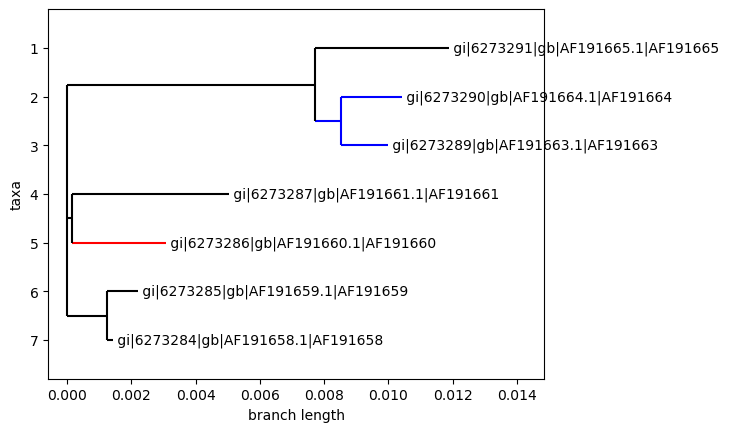

In [31]:
Phylo.draw(tree)
tree.clade[0,1].color = 'blue'
tree.clade[1,1].color = 'red'


## Describe 3 methods you can do with trees in biopython

#### 1- Visualizing tree (like the one above) 2-Parsing trees, this one to load trees into python. 3- Manipulatin trees to modify the tree structure. 
